# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [75]:
# import necessary libraries 
# imports
import warnings
warnings.filterwarnings('ignore')
# your code here
import pandas as pd
import numpy as np

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [76]:
# your code here
transfusion = pd.read_csv('transfusion.data')# your code here
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [77]:
# your code here
predictors = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']
transfusion.columns = predictors
transfusion.head()
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency      748 non-null int64
Frequency    748 non-null int64
Volume       748 non-null int64
Time         748 non-null int64
Target       748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

target rate = 0.23796791443850268


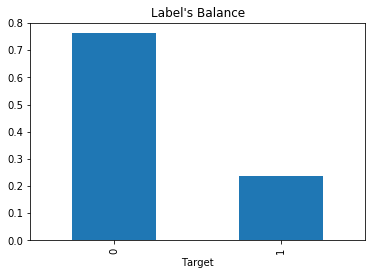

In [78]:
# your code here
%matplotlib inline
import matplotlib.pyplot as plt
print ('target rate =', transfusion.Target.mean())
(transfusion.groupby('Target').size()/transfusion.shape[0]).plot(kind="bar",title="Label's Balance")

In [79]:
# your code here

3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

            Recency  Frequency    Volume      Time    Target
Recency    1.000000  -0.182745 -0.182745  0.160618 -0.279869
Frequency -0.182745   1.000000  1.000000  0.634940  0.218633
Volume    -0.182745   1.000000  1.000000  0.634940  0.218633
Time       0.160618   0.634940  0.634940  1.000000 -0.035854
Target    -0.279869   0.218633  0.218633 -0.035854  1.000000


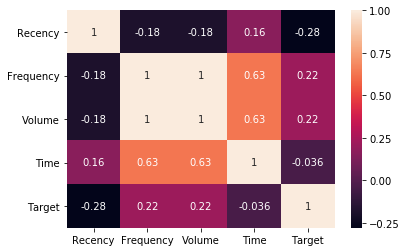

In [80]:
# your code here
import seaborn as sn
corrMatrix = transfusion.corr()
print(corrMatrix)

sn.heatmap(corrMatrix, annot=True)

3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

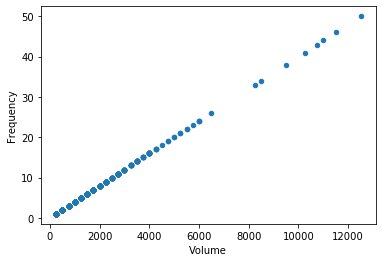

In [81]:
# your code here
axi = transfusion.plot.scatter(x ="Volume", y="Frequency")

In [82]:
# your code here

3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

We can remove one of them because they so much correlated, they pratically have the same influence

In [83]:
# your code here
transfusion.drop("Volume", axis=1, inplace=True)
transfusion.head()

,Recency,Frequency,Time,Target
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [84]:
# your code here
X = transfusion.drop("Target", axis=1, inplace=False)
y = transfusion["Target"]
transfusion.head()

,Recency,Frequency,Time,Target
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [85]:
# your code here
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
clf_log = LogisticRegression()
# your code here 

# your code here
scores_log = cross_val_score(clf_log, X, y, scoring='accuracy', cv=5)# your code here
print('cross validation r2 =', scores_log.mean())# your code here)

cross validation r2 = 0.7794541387024608


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [86]:
# your code here
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)  # by default, 10 trees are used
# your code here
clf_rf.fit(X, y)
print ('train accuracy =', clf_rf.score(X, y))# your code here)

# Cross validation
scores_rf = cross_val_score(clf_rf, transfusion[predictors], transfusion["Target"], scoring='accuracy', cv=5)# your code here
print('cross validation accuracy =', scores_rf.mean())# your code here)

train accuracy = 0.9050802139037433


KeyError: "['Volume'] not in index"

6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [ ]:
# your code here
params = # your code here
clf_rf2 = # your code here
clf_gs = # your code here
# your code here

7- Print the best score, and the best parameters

In [ ]:
# your code here

In [ ]:
# your code here

8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [ ]:
# your code here

9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [ ]:
# your code here
clf_rf2 = # your code here
clf_gs = # your code here
# your code here
print(# your code here)
print(# your code here)

10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [ ]:
# your code here